# 所需要的库的导入

In [1]:
import scipy.io as scio
import numpy as np
import torch
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils_bio import PCC, kendall, spear, similarity_evaluate, directed_connection_analysis, roi2rsn, roi2rsn_weight, tTest
import os
import pickle
import time
from Model import *
from itertools import chain
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.utils.data import DataLoader
from synthetic import simulate_lorenz_96, simulate_var
from utils import build_flags, time_split, save_result, evaluate_result, count_accuracy, loss_sparsity, loss_divergence, loss_mmd

# FC或dECN的分析和比较

## 数据读取

In [2]:
emoid1 = np.load('/home/xuzijian/crf/Intrer_VAE/PNC_SPM_emoid1.npy')
emoid4 = np.load('/home/xuzijian/crf/Intrer_VAE/PNC_SPM_emoid4.npy')

## 计算pearson、kendall、spearmanr相关系数

In [3]:
PCC1 = PCC(emoid1)
PCC4 = PCC(emoid4)
KEN1 = kendall(emoid1)
KEN4 = kendall(emoid4)
Spearmanr1 = spear(emoid1)
Spearmanr4 = spear(emoid4)

In [3]:
ECN1 = np.load('/home/xuzijian/crf/Intrer_VAE/adj_emoid1.npy')
ECN1 = ECN1.mean(axis=3).mean(axis=0)
ECN4 = np.load('/home/xuzijian/crf/Intrer_VAE/adj_emoid4.npy')
ECN4 = ECN4.mean(axis=3).mean(axis=0)

GC_cmlp1 = np.load('/home/xuzijian/crf/Intrer_VAE/adj_cmlp1.npy')
GC_cmlp4 = np.load('/home/xuzijian/crf/Intrer_VAE/adj_cmlp4.npy')

GC_clstm1 = np.load('/home/xuzijian/crf/Intrer_VAE/adj_clstm1.npy')
GC_clstm4 = np.load('/home/xuzijian/crf/Intrer_VAE/adj_clstm4.npy')

PCC1 = np.load('/home/xuzijian/crf/Intrer_VAE/PCC1.npy')
PCC1 = PCC1.mean(axis=0)
PCC4 = np.load('/home/xuzijian/crf/Intrer_VAE/PCC4.npy')
PCC4 = PCC4.mean(axis=0)

KEN1 = np.load('/home/xuzijian/crf/Intrer_VAE/KEN1.npy')
KEN1 = KEN1.mean(axis=0)
KEN4 = np.load('/home/xuzijian/crf/Intrer_VAE/KEN4.npy')
KEN4 = KEN4.mean(axis=0)

Spearmanr1 = np.load('/home/xuzijian/crf/Intrer_VAE/Spearmanr1.npy')
Spearmanr1 = Spearmanr1.mean(axis=0)
Spearmanr4 = np.load('/home/xuzijian/crf/Intrer_VAE/Spearmanr4.npy')
Spearmanr4 = Spearmanr4.mean(axis=0)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

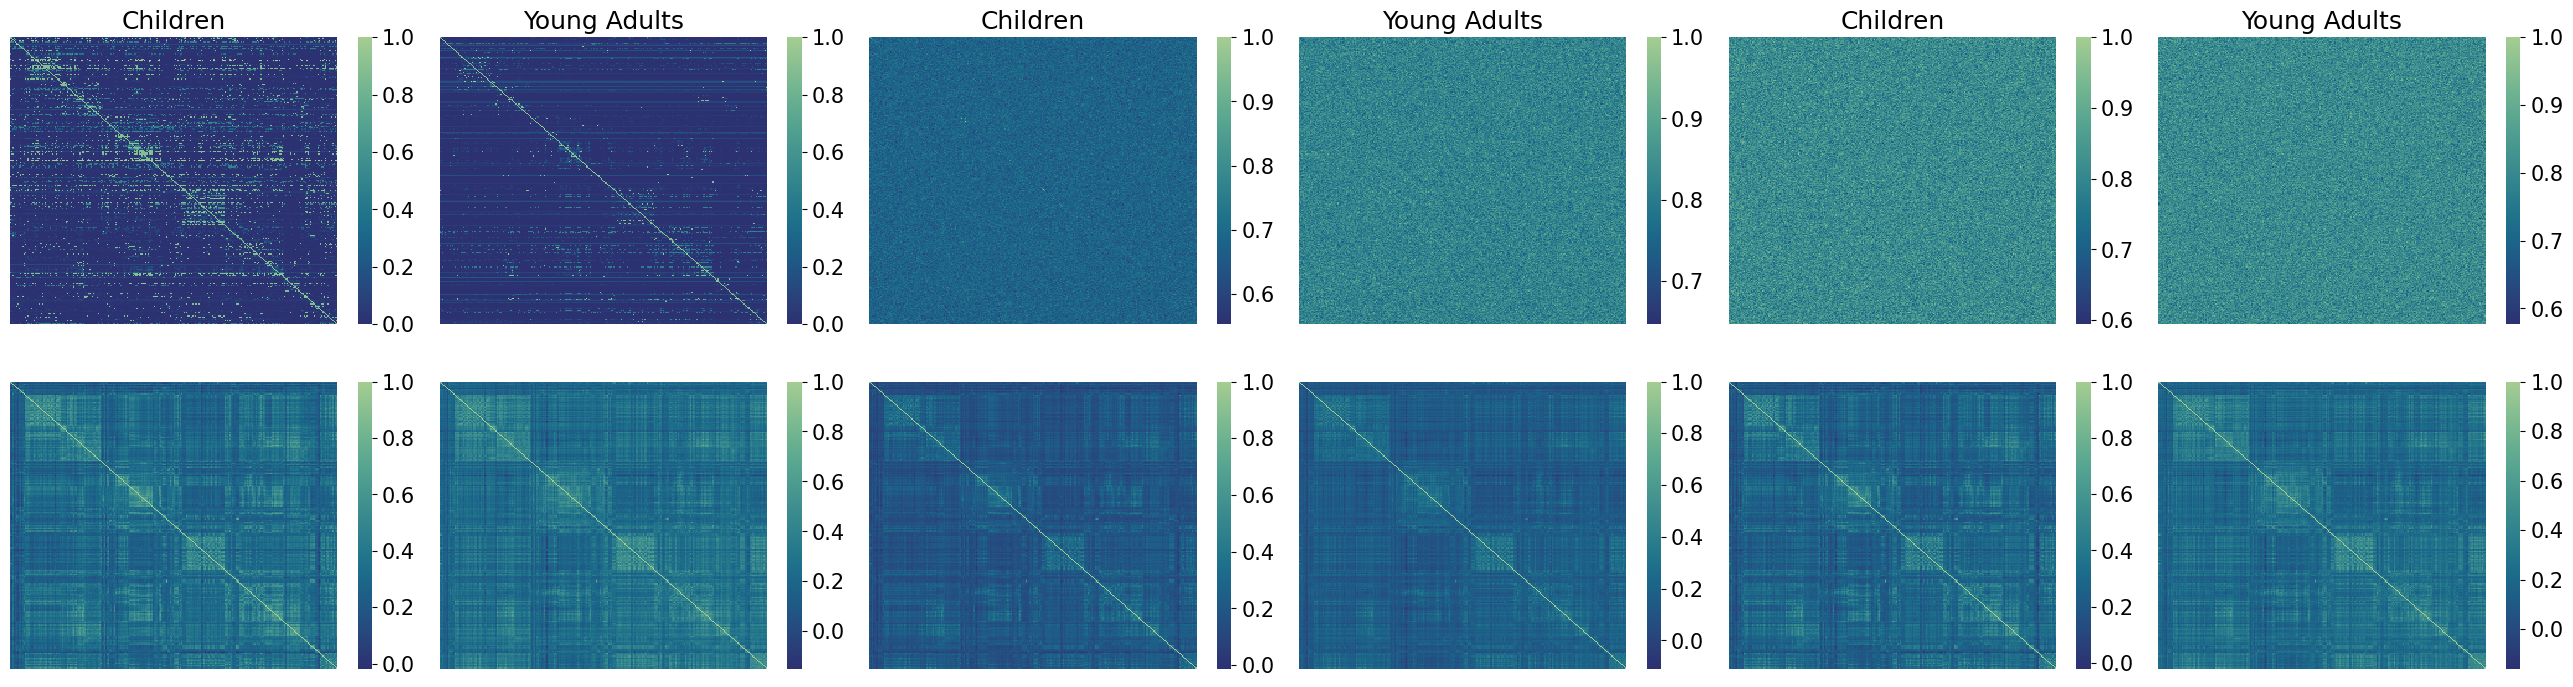

In [4]:
fig = plt.figure(figsize=(33,8.2))
plt.rc('font', family='Times New Roman', size=15)
fig1 = plt.subplot(2,6,1)
sns.heatmap(data=ECN1, cmap='crest_r', xticklabels=False, yticklabels=False)
fig1.set_title('Children')
fig2 = plt.subplot(2,6,2)
sns.heatmap(data=ECN4,cmap='crest_r', xticklabels=False, yticklabels=False)
fig2.set_title('Young Adults')

fig3 = plt.subplot(2,6,3)
sns.heatmap(data=GC_cmlp1/GC_cmlp1.max(), cmap='crest_r', xticklabels=False, yticklabels=False)
fig3.set_title('Children')
fig4 = plt.subplot(2,6,4)
sns.heatmap(data=GC_cmlp4/GC_cmlp4.max(), cmap='crest_r', xticklabels=False, yticklabels=False)
fig4.set_title('Young Adults')

fig5 = plt.subplot(2,6,5)
sns.heatmap(data=GC_clstm1/GC_clstm1.max(),cmap='crest_r', xticklabels=False, yticklabels=False)
fig5.set_title('Children')
fig6 = plt.subplot(2,6,6)
sns.heatmap(data=GC_clstm4/GC_clstm4.max(), cmap='crest_r', xticklabels=False, yticklabels=False)
fig6.set_title('Young Adults')

fig7 = plt.subplot(2,6,7)
sns.heatmap(data=PCC1, cmap='crest_r', xticklabels=False, yticklabels=False)
fig8 = plt.subplot(2,6,8)
sns.heatmap(data=PCC4,cmap='crest_r', xticklabels=False, yticklabels=False)

fig9 = plt.subplot(2,6,9)
sns.heatmap(data=KEN1, cmap='crest_r', xticklabels=False, yticklabels=False)
fig10 = plt.subplot(2,6,10)
sns.heatmap(data=KEN4,cmap='crest_r', xticklabels=False, yticklabels=False)

fig11 = plt.subplot(2,6,11)
sns.heatmap(data=Spearmanr1, cmap='crest_r', xticklabels=False, yticklabels=False)
fig12 = plt.subplot(2,6,12)
sns.heatmap(data=Spearmanr4,cmap='crest_r', xticklabels=False, yticklabels=False)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.2)